<a href="https://colab.research.google.com/github/Napawan2005/NLP-517432/blob/main/NLP_ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gender classification**

> 💬 ทำความน่าจะเป็นของตัวอักษรว่าอันไหนเป็นเพศหญิงหรือชาย

ทำ fn **หาตัวอักษรสุดท้าย**

In [53]:
def gender_features(word):
  return {'last_letter': word[-1]}

In [54]:
print(gender_features('Bam'))

{'last_letter': 'm'}


## **dowload Dataset**

In [55]:
import nltk
nltk.download('names')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


True

## **เช็คว่ามีกี่ไฟล์**

In [56]:
from nltk.corpus import names
print(names.fileids())


['female.txt', 'male.txt']


## **แสดงข้อมูลแต่ละไฟล์**

In [57]:
print(names.words('female.txt')[:10])
print(names.words('male.txt')[:10])

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale']
['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot', 'Abbott', 'Abby', 'Abdel', 'Abdul', 'Abdulkarim']


In [58]:
print(len(names.words('female.txt')))
print(len(names.words('male.txt')))

5001
2943


In [59]:
import matplotlib.pyplot as plt

labeled_name = ([(name , 'male') for name in names.words('male.txt')]+
                [(name, 'female') for name in names.words('female.txt')])

print(labeled_name)

[('Aamir', 'male'), ('Aaron', 'male'), ('Abbey', 'male'), ('Abbie', 'male'), ('Abbot', 'male'), ('Abbott', 'male'), ('Abby', 'male'), ('Abdel', 'male'), ('Abdul', 'male'), ('Abdulkarim', 'male'), ('Abdullah', 'male'), ('Abe', 'male'), ('Abel', 'male'), ('Abelard', 'male'), ('Abner', 'male'), ('Abraham', 'male'), ('Abram', 'male'), ('Ace', 'male'), ('Adair', 'male'), ('Adam', 'male'), ('Adams', 'male'), ('Addie', 'male'), ('Adger', 'male'), ('Aditya', 'male'), ('Adlai', 'male'), ('Adnan', 'male'), ('Adolf', 'male'), ('Adolfo', 'male'), ('Adolph', 'male'), ('Adolphe', 'male'), ('Adolpho', 'male'), ('Adolphus', 'male'), ('Adrian', 'male'), ('Adrick', 'male'), ('Adrien', 'male'), ('Agamemnon', 'male'), ('Aguinaldo', 'male'), ('Aguste', 'male'), ('Agustin', 'male'), ('Aharon', 'male'), ('Ahmad', 'male'), ('Ahmed', 'male'), ('Ahmet', 'male'), ('Ajai', 'male'), ('Ajay', 'male'), ('Al', 'male'), ('Alaa', 'male'), ('Alain', 'male'), ('Alan', 'male'), ('Alasdair', 'male'), ('Alastair', 'male'), 

In [60]:
male_last_letters = {}
female_last_letters = {}

In [61]:
for name,gender in labeled_name:
  last_letter = name[-1]
  if gender == 'male':
    male_last_letters[last_letter] = male_last_letters.get(last_letter, 0) + 1
  else:
    female_last_letters[last_letter] = female_last_letters.get(last_letter, 0) + 1

> Note 💬 <br>
> 1. ถ้ายังไม่มีคีย์นี้ ให้สร้างขึ้นมาและเริ่มที่ 0
`male_last_letters.setdefault(letter, 0)`
2. ตอนนี้มั่นใจแล้วว่ามีคีย์แน่นอน ก็บวกเพิ่มไป 1 ได้เลย
`male_last_letters[letter] += 1`

In [62]:
letters = sorted(set(male_last_letters.keys()) | set(female_last_letters.keys()))
male_counts = [male_last_letters.get(letter, 0) for letter in letters]
female_counts = [female_last_letters.get(letter, 0) for letter in letters]

In [63]:
print("male : ",male_counts)
print("female : ",female_counts)

male :  [0, 29, 21, 25, 228, 468, 25, 32, 93, 50, 3, 69, 187, 70, 478, 165, 18, 190, 230, 164, 12, 16, 17, 10, 332, 11]
female :  [1, 1773, 9, 0, 39, 1432, 2, 10, 105, 317, 1, 3, 179, 13, 386, 33, 2, 47, 93, 68, 6, 2, 5, 10, 461, 4]


In [64]:

# Create the bar chart
x = range(len(letters))
width = 0.35

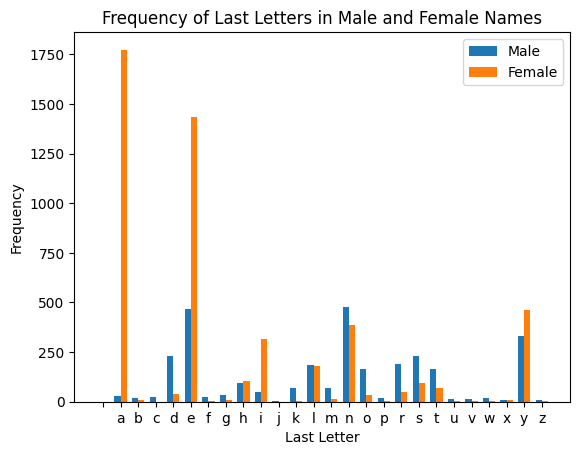

In [65]:
plt.bar(x, male_counts, width, label='Male')
plt.bar([i + width for i in x], female_counts, width, label='Female')
plt.xlabel('Last Letter')
plt.ylabel('Frequency')
plt.title('Frequency of Last Letters in Male and Female Names')
plt.xticks([i + width / 2 for i in x], letters)
plt.legend()
plt.show()

> Note💬<br>
`plt.bar([i + width for i in x], female_counts, width, label='Female')` = การเว้นระยะห่างแท่ง<br>
`plt.xticks([i + width / 2 for i in x], letters)` = ตัวอักษรให้อยู่ตรงกลาง


In [66]:
labeled_name

[('Aamir', 'male'),
 ('Aaron', 'male'),
 ('Abbey', 'male'),
 ('Abbie', 'male'),
 ('Abbot', 'male'),
 ('Abbott', 'male'),
 ('Abby', 'male'),
 ('Abdel', 'male'),
 ('Abdul', 'male'),
 ('Abdulkarim', 'male'),
 ('Abdullah', 'male'),
 ('Abe', 'male'),
 ('Abel', 'male'),
 ('Abelard', 'male'),
 ('Abner', 'male'),
 ('Abraham', 'male'),
 ('Abram', 'male'),
 ('Ace', 'male'),
 ('Adair', 'male'),
 ('Adam', 'male'),
 ('Adams', 'male'),
 ('Addie', 'male'),
 ('Adger', 'male'),
 ('Aditya', 'male'),
 ('Adlai', 'male'),
 ('Adnan', 'male'),
 ('Adolf', 'male'),
 ('Adolfo', 'male'),
 ('Adolph', 'male'),
 ('Adolphe', 'male'),
 ('Adolpho', 'male'),
 ('Adolphus', 'male'),
 ('Adrian', 'male'),
 ('Adrick', 'male'),
 ('Adrien', 'male'),
 ('Agamemnon', 'male'),
 ('Aguinaldo', 'male'),
 ('Aguste', 'male'),
 ('Agustin', 'male'),
 ('Aharon', 'male'),
 ('Ahmad', 'male'),
 ('Ahmed', 'male'),
 ('Ahmet', 'male'),
 ('Ajai', 'male'),
 ('Ajay', 'male'),
 ('Al', 'male'),
 ('Alaa', 'male'),
 ('Alain', 'male'),
 ('Alan', 'male

In [67]:
import nltk
from nltk.corpus import names
import random

# create training and testing data
names = ([(name, 'male') for name in names.words('male.txt')]  \
      + [(name, 'female') for name in names.words('female.txt')])

print(name)

Zuzana


`\` สะพานเชื่อมคำสั่ง

In [68]:
print(random.shuffle(names))

None


> Note 💬
`random.shuffle(names)` ทำหน้าที่ สุ่มลำดับข้อมูลใน List ใหม่ทั้งหมด ให้กระจัดกระจาย ไม่เรียงลำดับเหมือนเดิม

In [69]:
featuresets = [(gender_features(n), g) for (n,g) in names]

print(featuresets)

[({'last_letter': 'y'}, 'female'), ({'last_letter': 'a'}, 'female'), ({'last_letter': 'y'}, 'female'), ({'last_letter': 'a'}, 'female'), ({'last_letter': 'e'}, 'female'), ({'last_letter': 'y'}, 'male'), ({'last_letter': 'n'}, 'male'), ({'last_letter': 'y'}, 'female'), ({'last_letter': 'g'}, 'female'), ({'last_letter': 'l'}, 'male'), ({'last_letter': 'n'}, 'female'), ({'last_letter': 'e'}, 'male'), ({'last_letter': 'e'}, 'female'), ({'last_letter': 'a'}, 'female'), ({'last_letter': 'n'}, 'male'), ({'last_letter': 'e'}, 'male'), ({'last_letter': 'r'}, 'male'), ({'last_letter': 'a'}, 'female'), ({'last_letter': 'r'}, 'female'), ({'last_letter': 'a'}, 'female'), ({'last_letter': 'n'}, 'male'), ({'last_letter': 'a'}, 'female'), ({'last_letter': 'y'}, 'male'), ({'last_letter': 'a'}, 'female'), ({'last_letter': 'a'}, 'female'), ({'last_letter': 'e'}, 'female'), ({'last_letter': 'r'}, 'female'), ({'last_letter': 'a'}, 'female'), ({'last_letter': 'n'}, 'male'), ({'last_letter': 'a'}, 'female'),

In [70]:
train_set, test_set = featuresets[500:], featuresets[:500]

In [71]:
labeled_name

[('Aamir', 'male'),
 ('Aaron', 'male'),
 ('Abbey', 'male'),
 ('Abbie', 'male'),
 ('Abbot', 'male'),
 ('Abbott', 'male'),
 ('Abby', 'male'),
 ('Abdel', 'male'),
 ('Abdul', 'male'),
 ('Abdulkarim', 'male'),
 ('Abdullah', 'male'),
 ('Abe', 'male'),
 ('Abel', 'male'),
 ('Abelard', 'male'),
 ('Abner', 'male'),
 ('Abraham', 'male'),
 ('Abram', 'male'),
 ('Ace', 'male'),
 ('Adair', 'male'),
 ('Adam', 'male'),
 ('Adams', 'male'),
 ('Addie', 'male'),
 ('Adger', 'male'),
 ('Aditya', 'male'),
 ('Adlai', 'male'),
 ('Adnan', 'male'),
 ('Adolf', 'male'),
 ('Adolfo', 'male'),
 ('Adolph', 'male'),
 ('Adolphe', 'male'),
 ('Adolpho', 'male'),
 ('Adolphus', 'male'),
 ('Adrian', 'male'),
 ('Adrick', 'male'),
 ('Adrien', 'male'),
 ('Agamemnon', 'male'),
 ('Aguinaldo', 'male'),
 ('Aguste', 'male'),
 ('Agustin', 'male'),
 ('Aharon', 'male'),
 ('Ahmad', 'male'),
 ('Ahmed', 'male'),
 ('Ahmet', 'male'),
 ('Ajai', 'male'),
 ('Ajay', 'male'),
 ('Al', 'male'),
 ('Alaa', 'male'),
 ('Alain', 'male'),
 ('Alan', 'male

In [72]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [73]:
print(classifier.classify(gender_features('Neo')))
print(classifier.classify(gender_features('Trinity')))

male
female


In [74]:
print(nltk.classify.accuracy(classifier, test_set))

0.776


> Note 💬 <br>
`nltk.classify.accuracy(classifier, test_set)` ค่าเฉลี่ย

In [75]:

classifier.show_most_informative_features(20)

Most Informative Features
             last_letter = 'a'            female : male   =     35.3 : 1.0
             last_letter = 'k'              male : female =     31.4 : 1.0
             last_letter = 'f'              male : female =     16.0 : 1.0
             last_letter = 'p'              male : female =     11.9 : 1.0
             last_letter = 'v'              male : female =      9.9 : 1.0
             last_letter = 'd'              male : female =      9.5 : 1.0
             last_letter = 'm'              male : female =      9.1 : 1.0
             last_letter = 'o'              male : female =      8.4 : 1.0
             last_letter = 'r'              male : female =      7.4 : 1.0
             last_letter = 'g'              male : female =      5.9 : 1.0
             last_letter = 'w'              male : female =      5.1 : 1.0
             last_letter = 'z'              male : female =      4.4 : 1.0
             last_letter = 's'              male : female =      4.1 : 1.0

วิธีการอ่านผลคือ last_letter = 'a' ชื่อที่ลงท้ายด้วย a มีโอกาศเป็น male 35.8 ต่อ 1 ของผู้หญิง

In [76]:
from nltk.classify import apply_features
train_set = apply_features(gender_features, names[500:])
test_set = apply_features(gender_features, names[:500])

In [77]:
print(train_set)

[({'last_letter': 't'}, 'male'), ({'last_letter': 's'}, 'female'), ...]


In [78]:
print(test_set)

[({'last_letter': 'y'}, 'female'), ({'last_letter': 'a'}, 'female'), ...]


 > Note *💬*  <br>
> `apply_features`:
>- มันจะหยิบ `('Neo', 'male')` มา
> - มันจะดึงเฉพาะ '**Neo**' ส่งไปให้ฟังก์ชัน **gender_features** ทำงาน
> - พอมันได้ผลลัพธ์ `{'last_letter': 'o'} `กลับมา
>- มันจะเอา '**male**' (ป้ายกำกับเดิม) กลับมาแปะคู่กันเหมือนเดิม
>- กลายเป็น `({'last_letter': 'o'}, 'male')` พร้อมส่งเข้าโมเดล

In [79]:
def gender_features2(name):
  features = {}
  features["firstletter"] = name[0].lower()
  features["lastletter"] = name[-1].lower()

  for letter in 'abcdefghijklmnopqrstuvwxyz':
    features["count(%s)" % letter] = name.lower().count(letter)

    #print("count(%s) : " , letter , " | name.lower().count(letter) : ",name.lower().count(letter))
    features["has(%s)" % letter] = (letter in name.lower())
    #print("has(%s) : " , letter , " | (letter in name.lower()) : ",(letter in name.lower()))

    #print("--------------")
  return features


In [80]:
gender_features2('John')

{'firstletter': 'j',
 'lastletter': 'n',
 'count(a)': 0,
 'has(a)': False,
 'count(b)': 0,
 'has(b)': False,
 'count(c)': 0,
 'has(c)': False,
 'count(d)': 0,
 'has(d)': False,
 'count(e)': 0,
 'has(e)': False,
 'count(f)': 0,
 'has(f)': False,
 'count(g)': 0,
 'has(g)': False,
 'count(h)': 1,
 'has(h)': True,
 'count(i)': 0,
 'has(i)': False,
 'count(j)': 1,
 'has(j)': True,
 'count(k)': 0,
 'has(k)': False,
 'count(l)': 0,
 'has(l)': False,
 'count(m)': 0,
 'has(m)': False,
 'count(n)': 1,
 'has(n)': True,
 'count(o)': 1,
 'has(o)': True,
 'count(p)': 0,
 'has(p)': False,
 'count(q)': 0,
 'has(q)': False,
 'count(r)': 0,
 'has(r)': False,
 'count(s)': 0,
 'has(s)': False,
 'count(t)': 0,
 'has(t)': False,
 'count(u)': 0,
 'has(u)': False,
 'count(v)': 0,
 'has(v)': False,
 'count(w)': 0,
 'has(w)': False,
 'count(x)': 0,
 'has(x)': False,
 'count(y)': 0,
 'has(y)': False,
 'count(z)': 0,
 'has(z)': False}

 > Note *💬*  <br>
 `% letter` คือตัวที่จะเอามา "เสียบ" ใส่ในช่องว่างนั้น `%s`

In [81]:
train_names = names[1500:]     # กองใหญ่สุด (สำหรับสอน)
dev_names = names[500:1500]    # กองกลาง (Development / Validation Set) **ของใหม่**
test_names = names[:500]       # กองเล็ก (Test Set)

In [82]:
# 1. แปลงข้อมูลสำหรับ Train (แบบเรียน)
train_set = [(gender_features2(n), g) for (n,g) in train_names]

# 2. แปลงข้อมูลสำหรับ Dev-Test (ข้อสอบจำลอง / Validation)
devtest_set = [(gender_features2(n), g) for (n,g) in dev_names]

# 3. แปลงข้อมูลสำหรับ Test (ข้อสอบจริง)
test_set = [(gender_features2(n), g) for (n,g) in test_names]

In [83]:
# 1. แปลงข้อมูลสำหรับ Train (แบบเรียน)
train_set = [(gender_features2(n), g) for (n,g) in train_names]

# 2. แปลงข้อมูลสำหรับ Dev-Test (ข้อสอบจำลอง / Validation)
devtest_set = [(gender_features2(n), g) for (n,g) in dev_names]

# 3. แปลงข้อมูลสำหรับ Test (ข้อสอบจริง)
test_set = [(gender_features2(n), g) for (n,g) in test_names]

In [84]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [85]:
print(classifier)

In [86]:
print(classifier.classify(gender_features2('Neo')))
print(classifier.classify(gender_features2('Trinity')))

male
female


In [87]:
classifier.show_most_informative_features(50)

Most Informative Features
              lastletter = 'k'              male : female =     40.0 : 1.0
              lastletter = 'a'            female : male   =     33.1 : 1.0
              lastletter = 'p'              male : female =     16.3 : 1.0
              lastletter = 'f'              male : female =     14.5 : 1.0
              lastletter = 'm'              male : female =      9.4 : 1.0
                count(v) = 2              female : male   =      9.3 : 1.0
              lastletter = 'v'              male : female =      9.1 : 1.0
              lastletter = 'o'              male : female =      8.9 : 1.0
              lastletter = 'd'              male : female =      8.8 : 1.0
              lastletter = 'r'              male : female =      7.8 : 1.0
              lastletter = 'w'              male : female =      7.4 : 1.0
             firstletter = 'w'              male : female =      4.7 : 1.0
                count(f) = 2                male : female =      4.5 : 1.0

`show_most_informative_features ` :  ช่วยให้เราตรวจสอบได้ว่า "โมเดลเราฉลาดจริง หรือแค่ฟลุ๊ค?"

In [89]:
errors = []
for (name,tag) in dev_names:
    guess = classifier.classify(gender_features2(name))
    if guess != tag:
        errors.append((tag,guess,name))

print("%-8s %-8s %-30s"%("Label", "Guess", "Name"))
print("---------------------------------")
for (tag, guess, name) in sorted(errors):
    print("%-8s %-8s %-30s"%(tag,guess,name))

Label    Guess    Name                          
---------------------------------
female   male     Addis                         
female   male     Amargo                        
female   male     Aphrodite                     
female   male     Ardyth                        
female   male     Audrey                        
female   male     Berry                         
female   male     Britt                         
female   male     Brooke                        
female   male     Bryn                          
female   male     Buffy                         
female   male     Chryste                       
female   male     Clem                          
female   male     Cleo                          
female   male     Cody                          
female   male     Corly                         
female   male     Cortney                       
female   male     Cris                          
female   male     Daffy                         
female   male     Dagmar           

In [104]:
import random
import pandas as pd
import nltk
from nltk.corpus import names
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report



In [105]:
nltk.download('nmes',quiet=True)

labeled_names =  ([(name,0)  for name in names.words('male.txt')]+
                  [(name,1)  for name in names.words('female.txt')])

random.shuffle(labeled_names)#สลักลำดับกันแบบสุ่ม

[nltk_data] Error loading nmes: Package 'nmes' not found in index


In [106]:
# สลับข้อมูลให้กระจายตัว (Shuffle) เพราะข้อมูลเดิมเรียงชายล้วนแล้วหญิงล้วน
random.seed(42)
random.shuffle(labeled_names)

In [107]:
df = pd.DataFrame(labeled_names, columns=['name', 'gender'])

In [108]:
X = df['name']
y = df['gender']

In [109]:
# แบ่ง Train/Test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Total Data: {len(df)}")
print(f"Train set: {len(X_train)}, Test set: {len(X_test)}\n")

Total Data: 7944
Train set: 6355, Test set: 1589



`CountVectorizer `คือเครื่องมือพื้นฐานที่สุดในไลบรารี Scikit-learn ของ Python ที่ใช้สำหรับแปลง "ข้อความ" (Text) ให้กลายเป็น "ตัวเลข" (Vector)

In [110]:
pipelines = {
    '1. CountVec + NaiveBayes' : Pipeline([
        ('vectorizer', CountVectorizer(analyzer='char_wb' , ngram_range=(2,4))),
        ('classifier', MultinomialNB())
    ]),
    '2. CountVec + LogisticRegression' :Pipeline([
        ('vectorizer' , CountVectorizer(analyzer='char_wb' , ngram_range=(2,4))),
        ('classifier' , LogisticRegression())
    ]),
    '3. TFIDFVec + NaiveBayes' : Pipeline([
        ('vectorizer', TfidfVectorizer(analyzer='char_wb' , ngram_range=(2,4))),
        ('classifier', MultinomialNB())
    ]),
    '4. TFIDFVec + LogisticRegression' : Pipeline([
        ('vectorizer' , TfidfVectorizer(analyzer='char_wb' , ngram_range=(2,4))),
        ('classifier' , LogisticRegression())
    ])
}


In [112]:
results = []

print(f"{'Model Name':<30} | {'Accuracy':<10}")
print("-" * 45)
for name, pipe in pipelines.items():
    # Train
    pipe.fit(X_train, y_train)

    # Predict
    y_pred = pipe.predict(X_test)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc})

    print(f"{name:<30} | {acc:.4f}")


Model Name                     | Accuracy  
---------------------------------------------
1. CountVec + NaiveBayes       | 0.8307
2. CountVec + LogisticRegression | 0.8313
3. TFIDFVec + NaiveBayes       | 0.8062
4. TFIDFVec + LogisticRegression | 0.8326


In [117]:
#--- 4. ทดสอบทำนายชื่อใหม่ๆ ดูเล่น ---
print("\n--- Testing with New Names ---")
sample_names = ["Robert", "Jessica", "Somchai", "Supaporn", "Elon", "Taylor"]
best_model = pipelines['2. CountVec + LogisticRegression'] # สมมติเลือกตัวนี้มาโชว์
preds = best_model.predict(sample_names)
pred_labels = ["Female" if p==1 else "Male" for p in preds]

for n, p in zip(sample_names, pred_labels):
    print(f"Name: {n:<10} -> Prediction: {p}")


--- Testing with New Names ---
Name: Robert     -> Prediction: Male
Name: Jessica    -> Prediction: Female
Name: Somchai    -> Prediction: Male
Name: Supaporn   -> Prediction: Male
Name: Elon       -> Prediction: Male
Name: Taylor     -> Prediction: Male
